In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from smodels.decomposition.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.experiment.defaultFinalStates import finalStates
from smodels.base.model import Model
from collections import OrderedDict
from smodels.base.physicsUnits import fb, GeV
from itertools import product
from smodels.experiment.databaseObj import Database
import copy

### Get database

In [2]:
db = Database('official')

In [3]:
exp = db.getExpResults(analysisIDs='ATLAS-SUSY-2016-07',txnames='T6WZh')[0]
tx = exp.getTxNames()[0]
print(tx)

T6WZh


In [4]:
print(tx)
print(tx.constraint)
oldDM = copy.deepcopy(tx.dataMap)
print('oldDataMap:')
print(oldDM)

T6WZh
[[[jet],[Z]],[[jet],[W]]]+[[[jet],[higgs]],[[jet],[W]]]+[[[jet],[W]],[[jet],[W]]]+[[[jet],[Z]],[[jet],[Z]]]+[[[jet],[higgs]],[[jet],[higgs]]]+[[[jet],[Z]],[[jet],[higgs]]]
oldDataMap:
{0: (1, 'mass', 1.00E+00 [GeV]), 1: (2, 'mass', 1.00E+00 [GeV]), 2: (7, 'mass', 1.00E+00 [GeV]), 3: (3, 'mass', 1.00E+00 [GeV]), 4: (4, 'mass', 1.00E+00 [GeV]), 5: (10, 'mass', 1.00E+00 [GeV])}


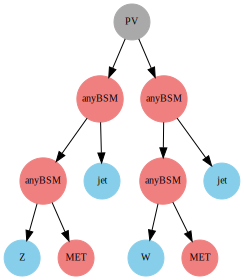

(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),jet), (anyBSM(2) > anyBSM(4),jet), (anyBSM(3) > Z,MET), (anyBSM(4) > W,MET)


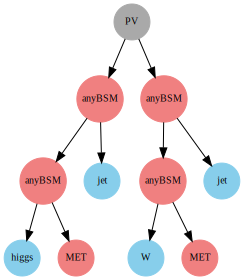

(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),jet), (anyBSM(2) > anyBSM(4),jet), (anyBSM(3) > higgs,MET), (anyBSM(4) > W,MET)


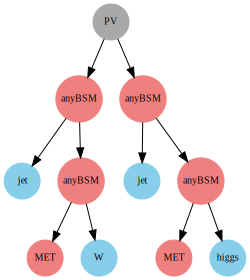

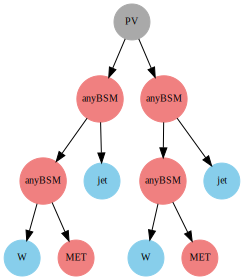

(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),jet), (anyBSM(2) > anyBSM(4),jet), (anyBSM(3) > W,MET), (anyBSM(4) > W,MET)


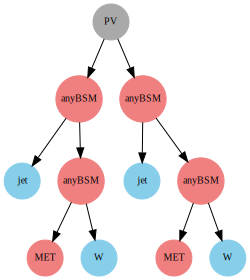

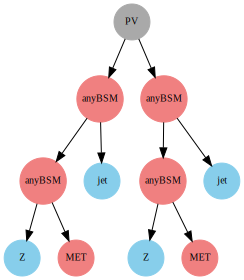

(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),jet), (anyBSM(2) > anyBSM(4),jet), (anyBSM(3) > Z,MET), (anyBSM(4) > Z,MET)


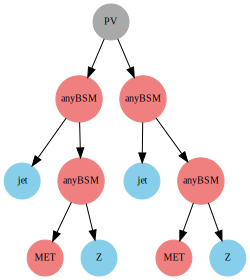

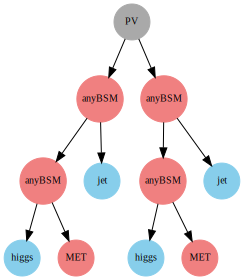

(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),jet), (anyBSM(2) > anyBSM(4),jet), (anyBSM(3) > higgs,MET), (anyBSM(4) > higgs,MET)


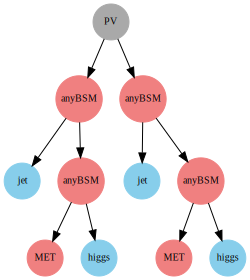

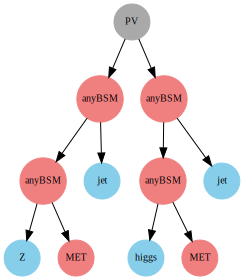

(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),jet), (anyBSM(2) > anyBSM(4),jet), (anyBSM(3) > Z,MET), (anyBSM(4) > higgs,MET)


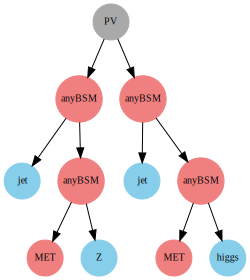

new dict:
{2: 1, 1: 2, 3: 5, 4: 6, 10: 8, 7: 9}


In [5]:
nodesOrder = None
relevantNodes = [v[0] for v in tx.dataMap.values()]
for expSMS in tx.smsMap:
    print('==================')
    print('Original:')
    expSMS.draw()
    # print(expSMS)
    if nodesOrder is None:
        nodesDict = expSMS.sort()
        nodesOrder = sorted([k for k in nodesDict.keys()], key = lambda n: nodesDict[n])
        continue
    else:
        expSMS.sortAccordingTo(nodesOrder)
        expSMS.bfs_sort(numberNodes=True)
    print('Reorder:')
    expSMS.draw()
    newNodesDict = expSMS.sort()
    print('Sorted:')
    expSMS.draw()

    # print(newNodesDict)
    # expSMS.draw()
    # Restrict to relevant nodes only
    # (ignore relabeling of nodes which are not needed by the data grid)
    newNodesDict = {k : v for k,v in newNodesDict.items() 
                    if k in relevantNodes}
    # Make sure all the SMS had their relevant nodes reordered in the same way 
    # (otherwise the dataMap can not be consistently changed for all SMS)
    if any(k != v for k,v in newNodesDict.items()):        
        print('new dict:')
        print(newNodesDict)
        break
    